In [6]:
%matplotlib inline

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from HeaderP import *
plt.rcParams.keys()
plt.rc('font', family='serif')
params = {
   'axes.labelsize': 30,
   'axes.linewidth': 1.5,
   'legend.fontsize': 25,
   'legend.frameon': False,
   'lines.linewidth': 2,
   'xtick.direction': 'in',
   'xtick.labelsize': 25,
   'xtick.major.bottom': True,
   'xtick.major.pad': 10,
   'xtick.major.size': 10,
   'xtick.major.width': 1,
   'xtick.minor.bottom': True,
   'xtick.minor.pad': 3.5,
   'xtick.minor.size': 5,
   'xtick.minor.top': True,
   'xtick.minor.visible': True,
   'xtick.minor.width': 1,
   'xtick.top': True,
   'ytick.direction': 'in',
   'ytick.labelsize': 25,
   'ytick.major.pad': 10,
   'ytick.major.size': 10,
   'ytick.major.width': 1,
   'ytick.minor.pad': 3.5,
   'ytick.minor.size': 5,
   'ytick.minor.visible': True,
   'ytick.minor.width': 1,
   'ytick.right': True,
   'figure.figsize': [10,10], # instead of 4.5, 4.5
   'savefig.format': 'eps',
   }
plt.rcParams.update(params)

def fitpoints(x,y):
    z = np.polyfit(x,y,1)
    p = np.poly1d(z)
    return p

import matplotlib.gridspec as gridspec
def diagnostics_1to1(ds, figname="1to1_label"):
        """ Plots survey labels vs. training labels, color-coded by survey SNR """
        label_names = ds.get_plotting_labels()
        nlabels = len(label_names)
        print(nlabels)
        reference_labels = ds.test_label
        test_labels = ds.test_label_vals

        for i in range(nlabels):
            snr = ds.test_SNR
            name = label_names[i]
            orig = reference_labels[:,i]
            cannon = test_labels[:,i]
            
            '''
            m1=cannon>-500
            m2=orig>-500
            m=m1&m2
            
            orig, cannon, snr=orig[m],cannon[m],snr[m]
            '''
            # calculate bias and scatter
            scatter = np.round(np.std(orig-cannon),5)
            bias  = np.round(np.mean(orig-cannon),5)

            low = np.minimum(min(orig), min(cannon))
            high = np.maximum(max(orig), max(cannon))

            fig = plt.figure(figsize=(10,6))
            gs = gridspec.GridSpec(1,2,width_ratios=[2,1], wspace=0.3)
            ax1 = plt.subplot(gs[0])
            ax2 = plt.subplot(gs[1])
            ax1.plot([low, high], [low, high], 'k-', linewidth=2.0, label="x=y")
            ax1.set_xlim(low, high)
            ax1.set_ylim(low, high)
            ax1.legend(fontsize=14, loc='lower right')

            pl = ax1.scatter(orig, cannon, marker='x', c=snr,
                    vmin=50, vmax=200, alpha=0.7)
            cb = plt.colorbar(pl, ax=ax1, orientation='horizontal')
            cb.set_label('SNR from Test Set', fontsize=12)
            textstr = 'Scatter: %s \nBias: %s' %(scatter, bias)
            ax1.text(0.05, 0.95, textstr, transform=ax1.transAxes,
                    fontsize=14, verticalalignment='top')
            ax1.tick_params(axis='x', labelsize=14)
            ax1.tick_params(axis='y', labelsize=14)
            ax1.set_xlabel("Reference Value", fontsize=14)
            ax1.set_ylabel("Cannon Test Value", fontsize=14)
            ax1.set_title("1-1 Plot of Label " + r"$%s$" % name)
            diff = cannon-orig
            npoints = len(diff)
            mu = np.mean(diff)
            sig = np.std(diff)
            #ax2.hist(diff, orientation='horizontal')
            ax2.hist(diff, range=[-3*sig,3*sig], color='k', bins=int(np.sqrt(npoints)),
                    orientation='horizontal', alpha=0.3, histtype='stepfilled')
            ax2.tick_params(axis='x', labelsize=14)
            ax2.tick_params(axis='y', labelsize=14)
            ax2.set_xlabel("Count", fontsize=14)
            ax2.set_ylabel("Difference", fontsize=14)
            ax2.axhline(y=0, c='k', lw=3, label='Difference=0')
            ax2.set_title("Training Versus Test Labels for $%s$" %name,
                    fontsize=14)
            ax2.legend(fontsize=14)
            figname_full = "%s_%s.png" %(figname, i)




In [7]:
df=pd.read_table('Vrard2016.csv',delimiter=',')
print(np.shape(df))

(6111, 12)


In [8]:
df_apogee=pd.read_pickle('/Users/lucy/Desktop/ASTR/Columbia/GalacticArch/APOGEE.pkl')


In [9]:
coo_kepler = SkyCoord(df['_RA']*u.deg, df['_DE']*u.deg)
coo_apogee = SkyCoord([i*u.deg for i in df_apogee['RA']], [i*u.deg for i in df_apogee['DEC']])


In [10]:
idx_sdss, d2d_sdss, d3d_sdss = coo_kepler.match_to_catalog_sky(coo_apogee)

In [11]:
df_apogeeCM=df_apogee.iloc[idx_sdss].reset_index(drop=True)

In [12]:
df_apogeeCM['KID']=df['KIC']

In [13]:
df_CM=pd.merge(df,df_apogeeCM,left_on='KIC',right_on='KID',how='inner')


In [14]:
#df_CM.to_pickle('Vrard2016_CM.pkl')

In [15]:
"""
filenames=[]
fields=df_CM.FIELD
filename=df_CM.APOGEE_ID
for i in range(len(df_CM)):
    path='/moto/astro/projects/APOGEE_dr16/apo25m/'+str(fields[i])+'/aspcapStar-r12-'+str(filename[i])+'.fits'
    filenames.append(path)
df_CM['path']=filenames
df_CM['path']

df=pd.read_pickle('Vrard2016_CM.pkl')
filenames=df['path']
for i in range(len(filenames)):
print('ls '+filenames[i])
"""

"\nfilenames=[]\nfields=df_CM.FIELD\nfilename=df_CM.APOGEE_ID\nfor i in range(len(df_CM)):\n    path='/moto/astro/projects/APOGEE_dr16/apo25m/'+str(fields[i])+'/aspcapStar-r12-'+str(filename[i])+'.fits'\n    filenames.append(path)\ndf_CM['path']=filenames\ndf_CM['path']\n\ndf=pd.read_pickle('Vrard2016_CM.pkl')\nfilenames=df['path']\nfor i in range(len(filenames)):\nprint('ls '+filenames[i])\n"

In [16]:
import os
from astropy.io import fits as pyfits
def load_spectra(data_dir):
    """ Reads wavelength, flux, and flux uncertainty data from apogee fits files

    Parameters
    ----------
    data_dir: str
        Name of the directory containing all of the data files

    Returns
    -------
    wl: ndarray
        Rest-frame wavelength vector

    fluxes: ndarray
        Flux data values

    ivars: ndarray
        Inverse variance values corresponding to flux values
    """
    print("Loading spectra from directory %s" %data_dir)
    files = list(sorted([data_dir + "/" + filename
             for filename in os.listdir(data_dir) if filename.endswith('fits')]))
    nstars = len(files)  
    for jj, fits_file in enumerate(files):
        file_in = pyfits.open(fits_file)
        #print(file_in)
        flux = np.array(file_in[1].data)
        if jj == 0:
            npixels = len(flux)
            fluxes = np.zeros((nstars, npixels), dtype=float)
            ivars = np.zeros(fluxes.shape, dtype=float)
            start_wl = file_in[1].header['CRVAL1']
            diff_wl = file_in[1].header['CDELT1']
            val = diff_wl * (npixels) + start_wl
            wl_full_log = np.arange(start_wl,val, diff_wl)
            wl_full = [10 ** aval for aval in wl_full_log]
            wl = np.array(wl_full)
        flux_err = np.array((file_in[2].data))
        badpix = get_pixmask(flux, flux_err)
        ivar = np.zeros(npixels)
        ivar[~badpix] = 1. / flux_err[~badpix]**2
        fluxes[jj,:] = flux
        ivars[jj,:] = ivar
    # convert filenames to actual IDs
    names = np.array([f.split('r12-')[1].split('.fits')[0] for f in files])
    print("Spectra loaded")
    # make sure they are numpy arrays
    return np.array(names), np.array(wl), np.array(fluxes), np.array(ivars)

def get_pixmask(fluxes, flux_errs):
    """ Create and return a bad pixel mask for an APOGEE spectrum

    Bad pixels are defined as follows: fluxes or errors are not finite, or 
    reported errors are <= 0, or fluxes are 0

    Parameters
    ----------
    fluxes: ndarray
        Flux data values 

    flux_errs: ndarray
        Flux uncertainty data values 

    Returns
    -------
    mask: ndarray
        Bad pixel mask, value of True corresponds to bad pixels
    """
    bad_flux = np.logical_or(~np.isfinite(fluxes), fluxes == 0)
    bad_err = (~np.isfinite(flux_errs)) | (flux_errs <= 0)
    bad_pix = bad_err | bad_flux
    return bad_pix

In [17]:
df2=pd.read_table('AstroAges.csv',delimiter=',')
df2.columns

Index(['KIC', 'Nmax-A2Z', 'Dnu-A2Z', 'Nmax-CAN', 'Dnu-CAN', 'Nmax-COR',
       'Dnu-COR', 'Nmax-OCT', 'Dnu-OCT', 'Nmax-SYD', 'Dnu-SYD', 'KIC.1',
       '2MASS', 'Teff', 'FeH', 'AFe', 'Numax', 'Dnu', 'ES', 'Fdnu', 'M(cor)',
       's_M(cor)', 'R(cor)', 's_R(cor)', 'logg(seis)', 's_logg(seis)', 'Rho',
       's_Rho', 'LogAge', 'Av', 'Notes', 'AP-1', '_RA', '_DE'],
      dtype='object')

In [210]:
df_age=pd.merge(df_CM,df2[['KIC','LogAge']],left_on='KIC',right_on='KIC',how='inner')

In [211]:
df_age

KIC   Dnu   DPi1  e_DPi1     q     M   e_M  Alias  Measure  Status  \
0      1027337  6.95   70.1    0.36  0.09  1.57  0.08      0        2       0   
1      1162746  3.81  255.6   12.52  0.27  0.89  0.09      0        1       1   
2      1161618  4.07  327.5    3.61  0.49  1.31  0.08      0        2       1   
3      1429505  5.80   67.9    2.37  0.11  1.19  0.06      0        1       0   
4      1571780  4.47  336.7    5.36  0.25  2.15  0.17      0        2       2   
...        ...   ...    ...     ...   ...   ...   ...    ...      ...     ...   
2987  12647649  4.14  334.1    3.56  0.31  1.03  0.11      0        2       1   
2988  12884930  4.32  329.9    4.11  0.31  1.43  0.07      0        2       1   
2989  10904520  9.12   73.7    0.55  0.19  1.39  0.08      0        2       0   
2990  11068380  7.63   73.4    0.43  0.23  1.34  0.07      0        2       0   
2991  11175619  3.78  265.2    1.94  0.29  0.92  0.07      0        2       1   

      ...  GAIA_PHOT_RP_MEAN_MAG  GAIA_RADIAL_VELOCITY  \
0     ...              11.320031            -28.212716   
1     ...              10.740301           -114.665310   
2     ...               9.483814            -47.135158   
3     ...              11.183847              8.184749   
4     ...               9.871522            -50.170435   
...   ...                    ...                   ...   
2987  ...               9.977797             -1.382551   
2988  ...              12.080231            -44.595842   
2989  ...              11.511994              2.529876   
2990  ...              11.774503             17.214897   
2991  ...               9.817907           -104.906418   

     GAIA_RADIAL_VELOCITY_ERROR   GAIA_R_EST    GAIA_R_LO    GAIA_R_HI  \
0                      0.584146  1365.255020  1323.671098  1409.484955   
1                      0.522337  1300.861092  1259.198291  1345.320662   
2                      0.181371   786.943035   771.907531   802.564940   
3                      0.763235  1184.125821  1146.986259  1223.703561   
4                      0.231024  1125.850525  1093.931399  1159.652109   
...                         ...          ...          ...          ...   
2987                   0.198953  1108.566875  1070.892881  1148.933596   
2988                   0.801880  2502.289708  2374.802793  2643.853854   
2989                   0.533248  1256.867503  1228.137552  1286.947598   
2990                   0.819777  1452.174016  1412.151881  1494.484920   
2991                   0.382132   938.658369   919.246194   958.892441   

        TEFF_SPEC LOGG_SPEC       KID LogAge  
0     4564.500000    2.9858   1027337  3.798  
1     4726.700195    2.6848   1162746  3.786  
2     4683.899902    2.8143   1161618  3.639  
3     4601.100098    2.8346   1429505  3.867  
4     4859.399902    3.0379   1571780  2.878  
...           ...       ...       ...    ...  
2987  4924.000000    2.7855  12647649  3.625  
2988  4874.899902    2.8980  12884930  3.469  
2989  4789.600098    3.1019  10904520  3.707  
2990  4640.200195    2.9649  11068380  3.859  
2991  4666.100098    2.6351  11175619  3.832  

[2992 rows x 216 columns]

In [212]:
df_temp=pd.read_pickle('/Users/lucy/Desktop/KeplerAges/KinageAllKepler_cut.pkl')


In [213]:
# read in data and process

from TheCannon import apogee
tr_ID_r, wl_r, tr_flux_r, tr_ivar_r = load_spectra("Vrardstars")


Loading spectra from directory Vrardstars
Spectra loaded


In [214]:
df_age['FLAGREAD']=[i&2**23 for i in df_age.ASPCAPFLAG]

In [215]:
df_age=df_age.loc[df_age['FLAGREAD']==0].reset_index(drop=True)

In [216]:
df_age.ASPCAPFLAG.unique()

array([   0,  640, 2176, 2688], dtype=int32)

In [217]:
#df_age=df_age.loc[df_age.STARFLAG==0].reset_index(drop=True)

(2616, 8)


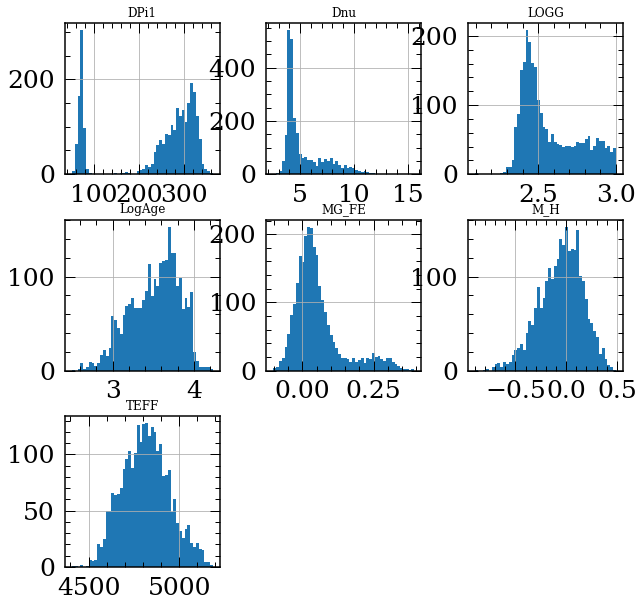

In [218]:
df_pick = df_age.loc[df_age['APOGEE_ID'].isin(tr_ID_r)].drop_duplicates(subset='APOGEE_ID',keep='first')[['M_H','TEFF','LOGG','MG_FE','DPi1','Dnu','APOGEE_ID','LogAge']].dropna()
m1 = df_pick['MG_FE']>-500
m2 = df_pick['M_H']>-1
m3 = df_pick['TEFF']>0
m4 = (df_pick['LOGG']<3) & (df_pick['LOGG']>2)

m=m1&m2&m3&m4
df_pick=df_pick[m]

df_pick.hist(bins=50)


print(np.shape(df_pick))


In [219]:


tr_ID_pick=df_pick['APOGEE_ID'].values

m=np.zeros(len(tr_ID_r),dtype='bool')
for i in range(len(m)):
    if tr_ID_r[i] in tr_ID_pick:
        m[i]=1

tr_ID, wl, tr_flux, tr_ivar = tr_ID_r[m], wl_r, tr_flux_r[m,:], tr_ivar_r[m,:]


In [220]:
tr_label=np.zeros((len(tr_ID),7))

for i in range((len(tr_ID))):
    #print(i)
    tr_label[i,:]=df_pick.loc[df_pick['APOGEE_ID']==tr_ID[i]][['M_H','TEFF','LOGG','MG_FE','DPi1','Dnu','LogAge']].values
               

In [221]:
print(len(tr_ID),np.shape(df_pick))

2616 (2616, 8)


In [222]:
np.shape(tr_label)

(2616, 7)

In [223]:
def _SNR(flux, ivar):
    """ Calculate the SNR of a spectrum, ignoring bad pixels

    Parameters
    ----------
    flux: numpy ndarray
        pixel intensities
    ivar: numpy ndarray
        inverse variances corresponding to flux

    Returns
    -------
    SNR: float
    """
    take = ivar > 0
    SNR = float(np.median(flux[take]*(ivar[take]**0.5)))
    return SNR  

In [224]:
#take = tr_ivar > 0
SNR = np.array([_SNR(*s) for s in zip(tr_flux, tr_ivar)])
    

In [225]:
len(SNR)

2616

In [226]:
m_snr=SNR>100

In [227]:
tr_ID, tr_flux, tr_ivar=tr_ID[m_snr],tr_flux[m_snr,:], tr_ivar[m_snr,:]

In [228]:
tr_label=tr_label[m_snr,:]

In [229]:
print(tr_ID.shape)
print(wl.shape)
print(tr_flux.shape)
print(tr_ivar.shape)
print(tr_label.shape)


(2480,)
(8575,)
(2480, 8575)
(2480, 8575)
(2480, 7)


In [230]:
#plt.scatter(tr_flux[:,1000],tr_label[:,0],c=tr_ivar[:,1000])

In [231]:
"""
Ntrain=int(len(tr_label)*0.8)
shuffle_inds = np.arange(len(tr_ID))
np.random.shuffle(shuffle_inds)

train_ID = tr_ID[shuffle_inds[:Ntrain]]
train_flux = tr_flux[shuffle_inds[:Ntrain],:]
train_ivar = tr_ivar[shuffle_inds[:Ntrain],:]
train_label = tr_label[shuffle_inds[:Ntrain],:]

test_ID = tr_ID[shuffle_inds[Ntrain:]]
test_flux = tr_flux[shuffle_inds[Ntrain:],:]
test_ivar = tr_ivar[shuffle_inds[Ntrain:],:]
test_label = tr_label[shuffle_inds[Ntrain:],:]
"""

train_ID = tr_ID
train_flux = tr_flux
train_ivar = tr_ivar
train_label = tr_label

test_ID = tr_ID
test_flux = tr_flux
test_ivar = tr_ivar
test_label = tr_label

In [232]:
tr_label

array([[ 6.69944510e-02,  4.72343604e+03,  2.87110639e+00, ...,
         7.31000000e+01,  8.13000000e+00,  3.90300000e+00],
       [-2.11645011e-03,  5.11787256e+03,  2.90108538e+00, ...,
         2.16500000e+02,  7.13000000e+00,  2.63200000e+00],
       [ 1.72688454e-01,  4.72033203e+03,  2.47463202e+00, ...,
         3.10700000e+02,  4.17000000e+00,  3.34500000e+00],
       ...,
       [ 3.89498442e-01,  4.60879541e+03,  2.82066321e+00, ...,
         6.51000000e+01,  7.07000000e+00,  3.72200000e+00],
       [-6.71015456e-02,  4.86201953e+03,  2.48218441e+00, ...,
         3.26300000e+02,  4.52000000e+00,  3.33900000e+00],
       [ 1.70958444e-01,  4.98354492e+03,  2.76060724e+00, ...,
         2.84300000e+02,  6.18000000e+00,  3.02400000e+00]])

In [233]:
len(train_label)

2480

In [234]:
from TheCannon import dataset
#from importlib import reload  
#reload(dataset)

ds = dataset.Dataset(wl, train_ID, train_flux, train_ivar, train_label, 
                     test_ID, test_flux, test_ivar, test_label)


Loading dataset
This may take a while...


In [235]:
print(ds.tr_ID)
print(ds.tr_flux)
print(ds.wl)

['2M18401969+4348380' '2M18410298+4315506' '2M18414238+4350256' ...
 '2M20045602+4439587' '2M20045740+4432482' '2M20062364+4427383']
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[15100.80154164 15101.01016837 15101.21879797 ... 16999.33764336
 16999.57249951 16999.80735891]


In [236]:
ds.set_label_names(['[Fe/H]','T_{eff}','Log(g)','[Mg/Fe]','D P','D nu','LogAge'])



Diagnostic for SNRs of reference and survey objects


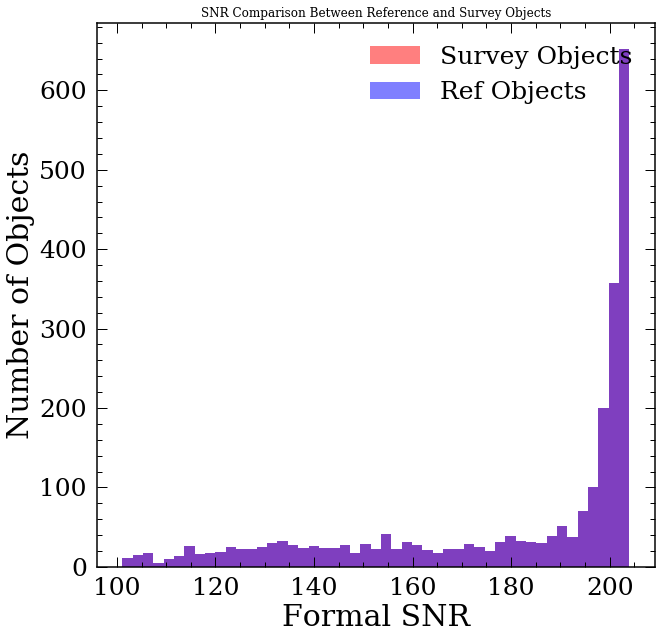

In [237]:
fig = ds.diagnostics_SNR()



Plotting every label against every other


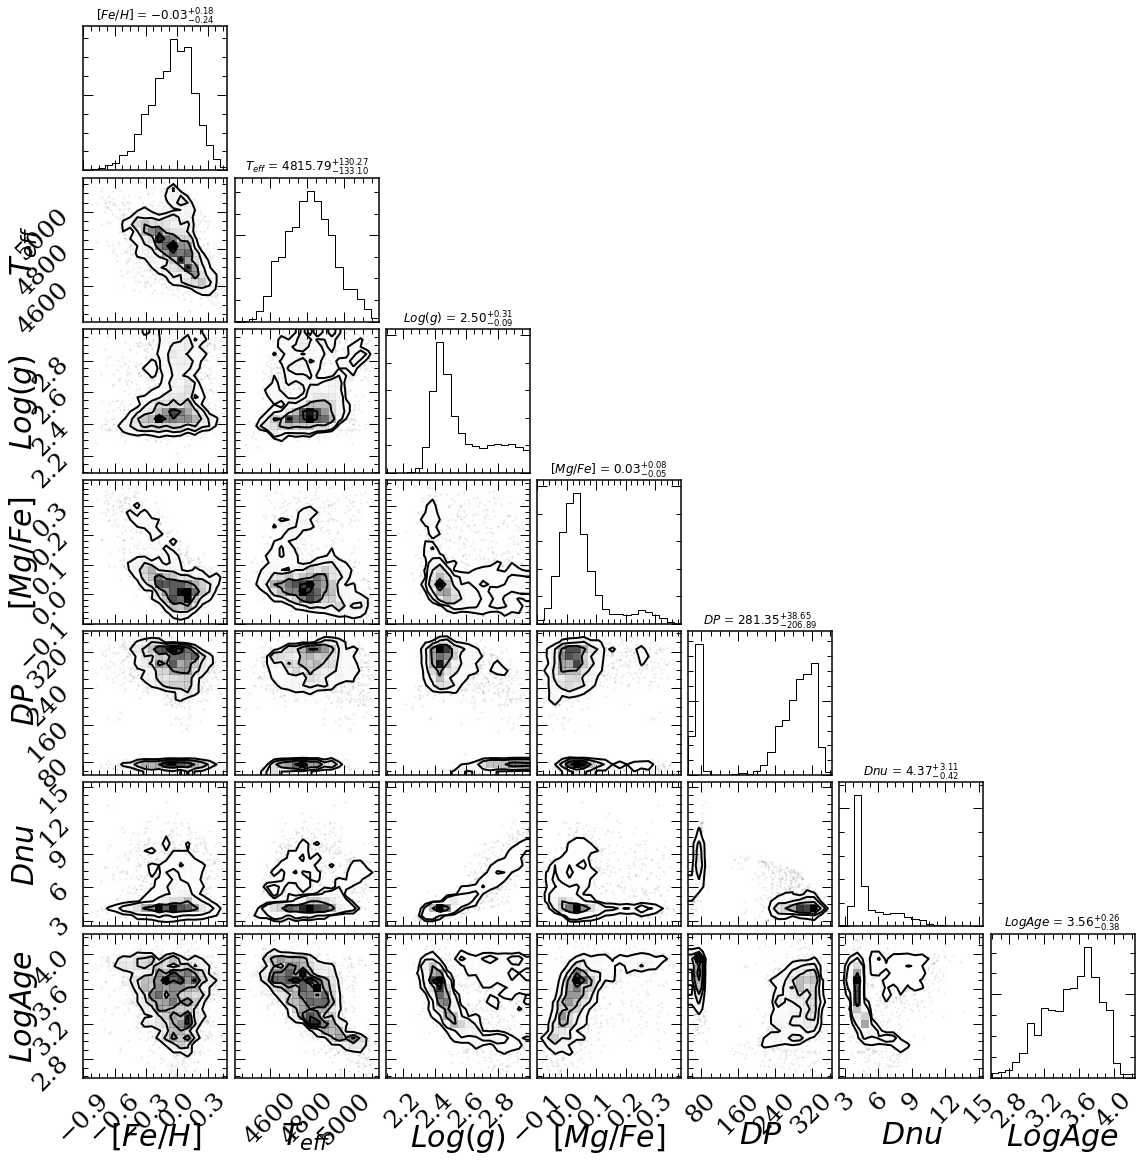

In [238]:
fig = ds.diagnostics_ref_labels()

In [239]:
#from importlib import reload  
#reload(model)

In [240]:
from TheCannon import model
md = model.CannonModel(2, useErrors=False)
md.fit(ds)

<TheCannon.model.CannonModel object at 0x1710e6128> <TheCannon.dataset.Dataset object at 0x178e23588>
Done training model. 


In [241]:
#md.diagnostics_contpix(ds)


Diagnostic plot: leading coeffs and scatters across wavelength.


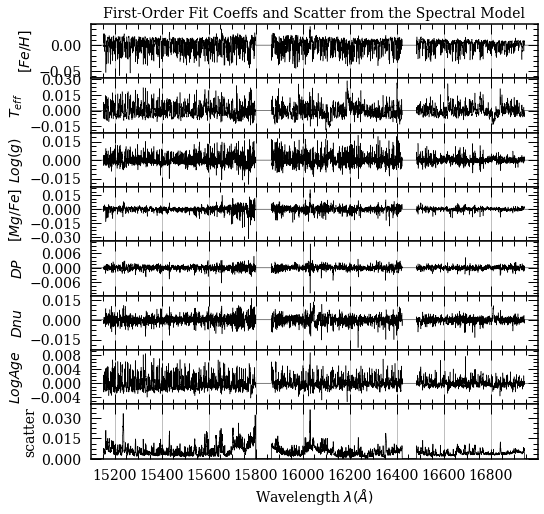

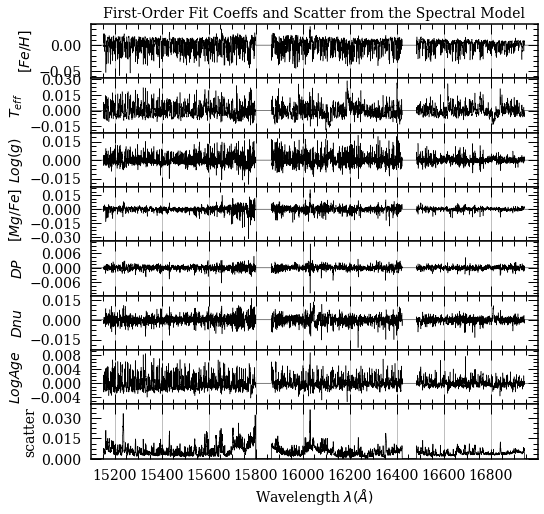

In [242]:
md.diagnostics_leading_coeffs(ds)


In [243]:
md.diagnostics_plot_chisq(ds)

Diagnostic plot: histogram of the red chi squareds of the fit
Saved as modelfit_chisqs.png


In [244]:
label_errs = md.infer_labels(ds)

Inferring Labels


In [245]:
test_labels = ds.test_label_vals

In [246]:
ds.diagnostics_test_step_flagstars()

Reference label [Fe/H]
flagged 111 stars beyond 2-sig of ref labels
Saved list flagged_stars_0.txt
Reference label T_{eff}
flagged 104 stars beyond 2-sig of ref labels
Saved list flagged_stars_1.txt
Reference label Log(g)
flagged 101 stars beyond 2-sig of ref labels
Saved list flagged_stars_2.txt
Reference label [Mg/Fe]
flagged 202 stars beyond 2-sig of ref labels
Saved list flagged_stars_3.txt
Reference label D P
flagged 76 stars beyond 2-sig of ref labels
Saved list flagged_stars_4.txt
Reference label D nu
flagged 160 stars beyond 2-sig of ref labels
Saved list flagged_stars_5.txt
Reference label LogAge
flagged 122 stars beyond 2-sig of ref labels
Saved list flagged_stars_6.txt


Plotting every label against every other


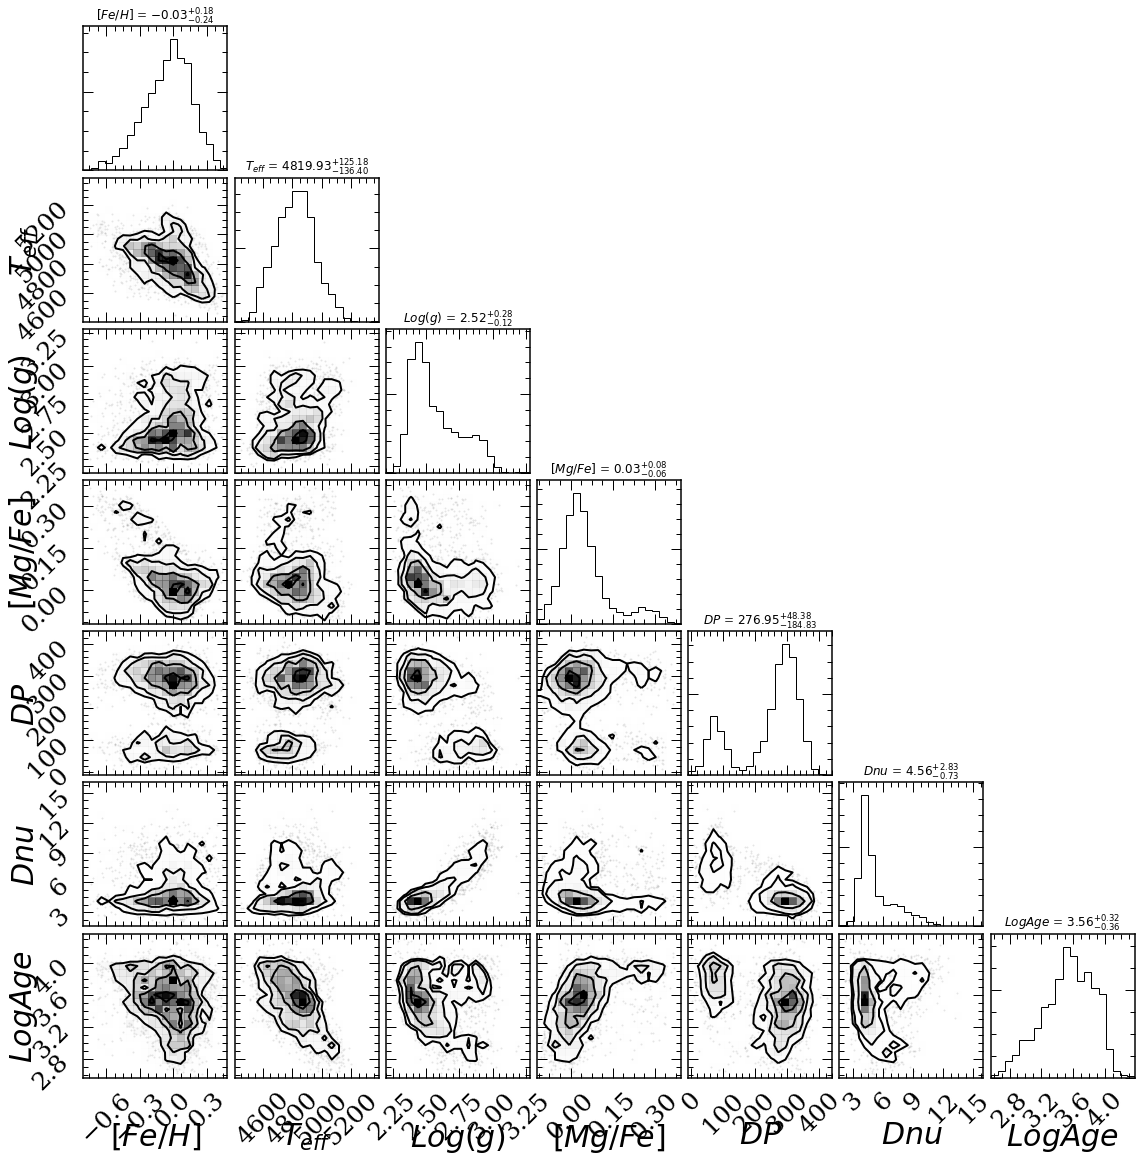

In [247]:
ds.diagnostics_survey_labels()

In [248]:
ds.tr_label=test_label

7


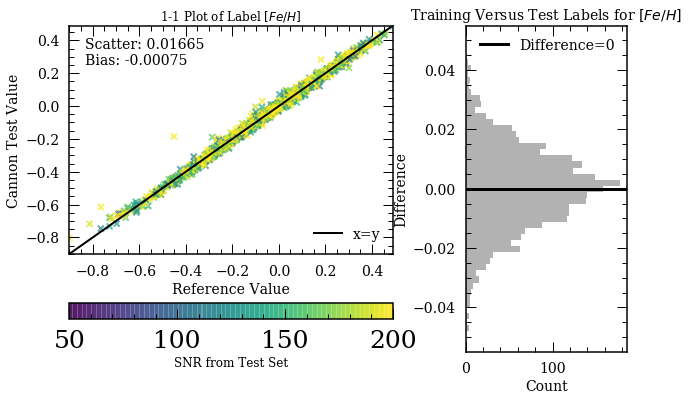

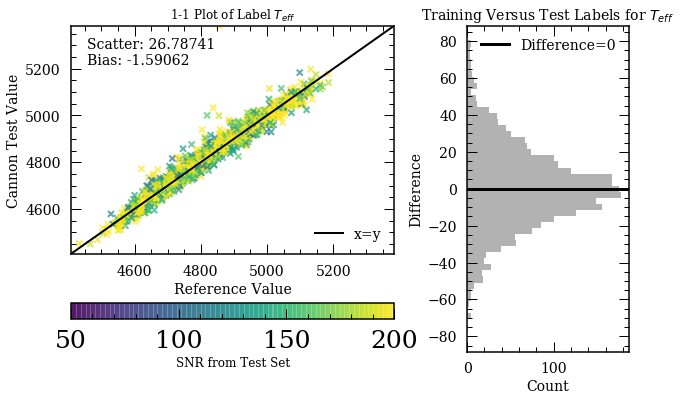

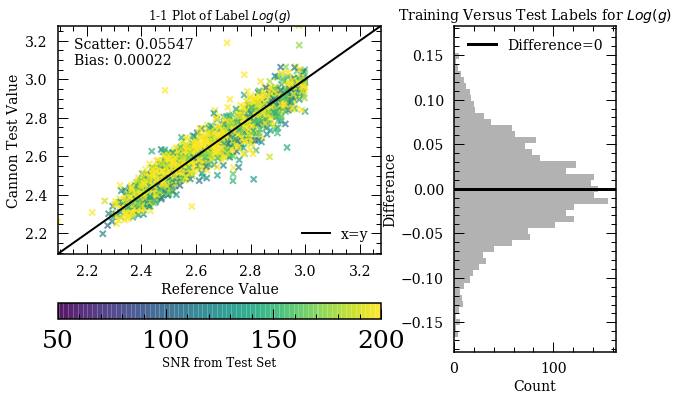

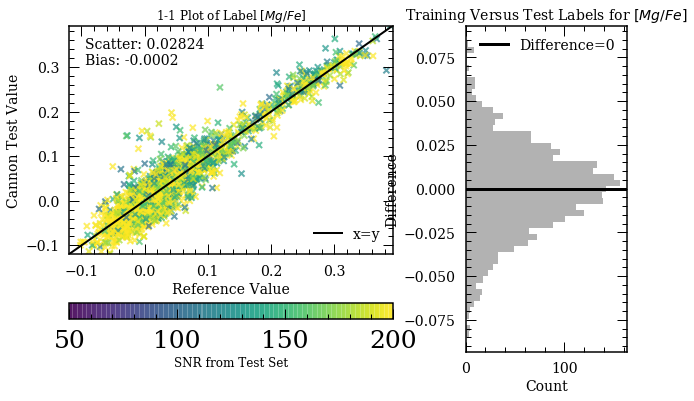

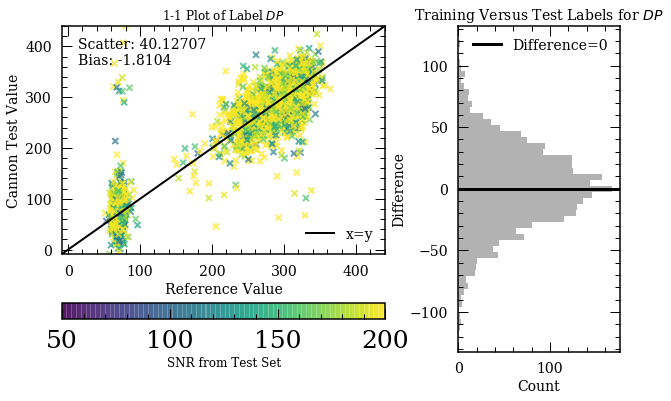

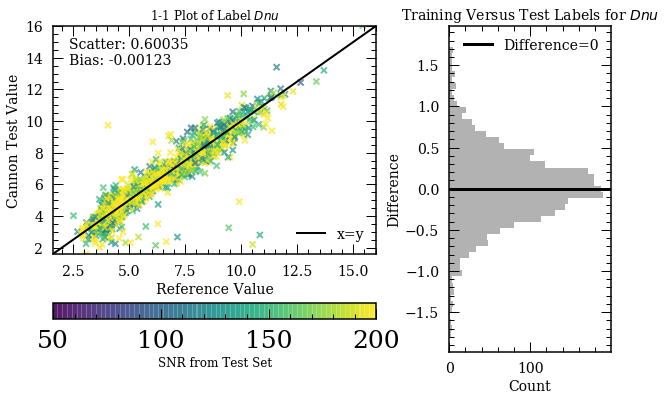

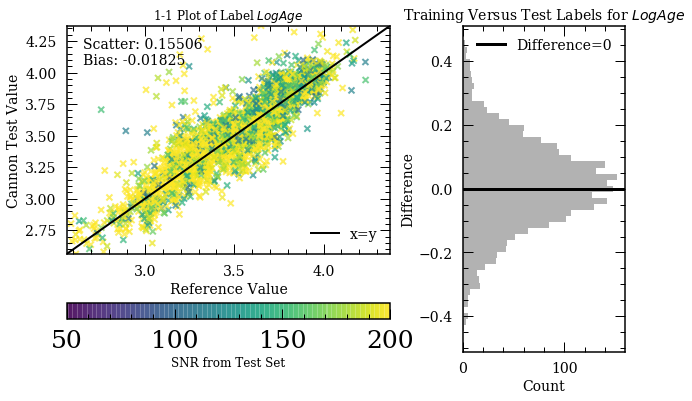

In [249]:
# with more stars 
diagnostics_1to1(ds)

7


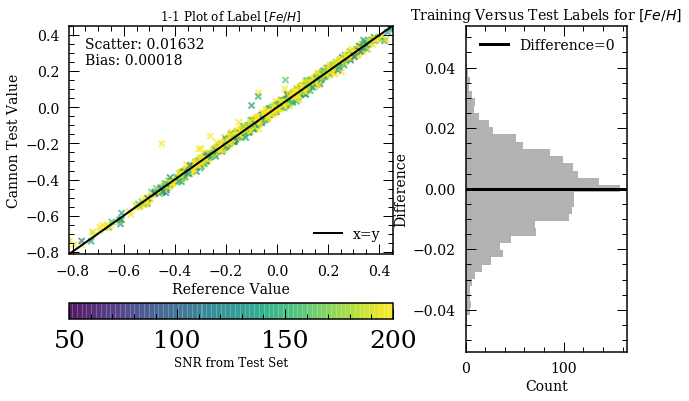

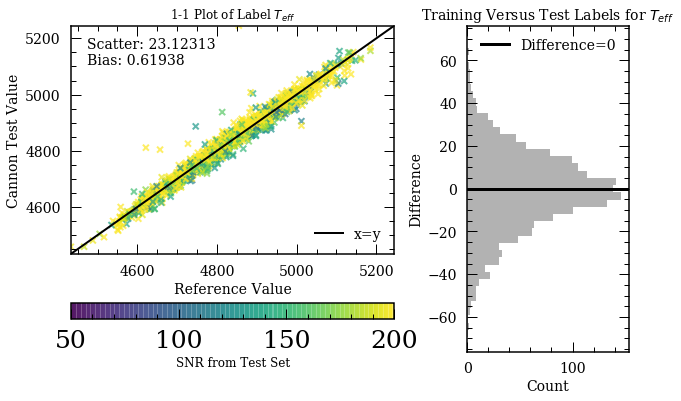

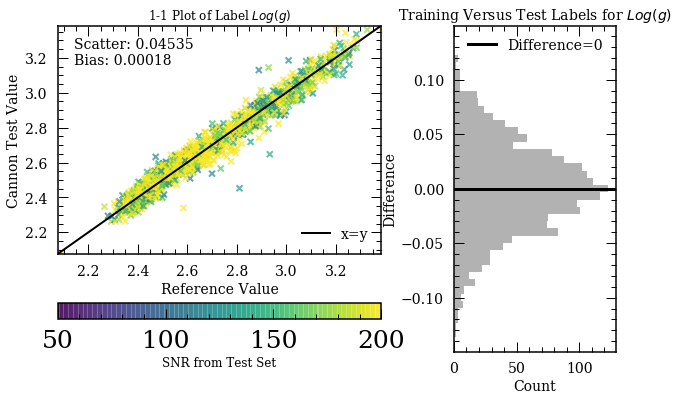

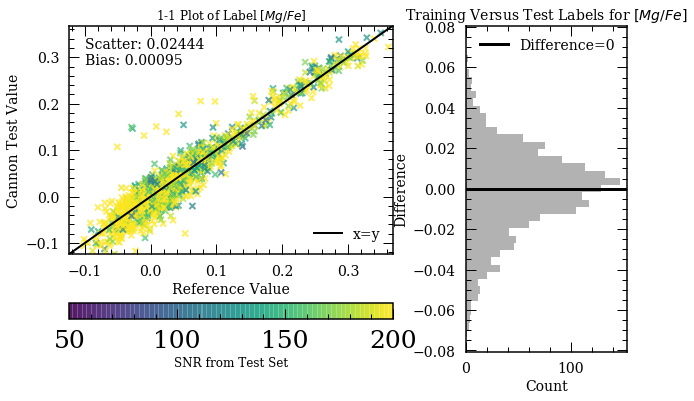

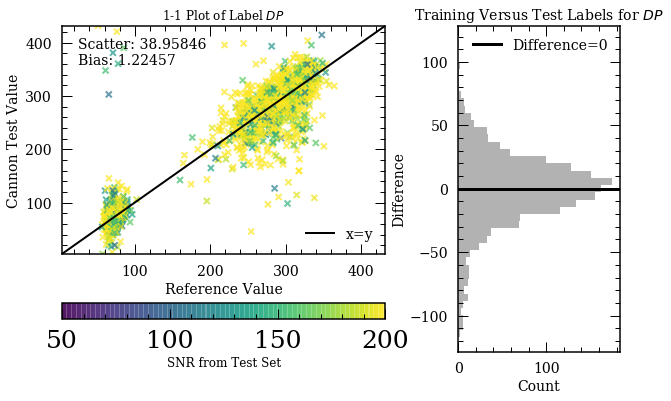

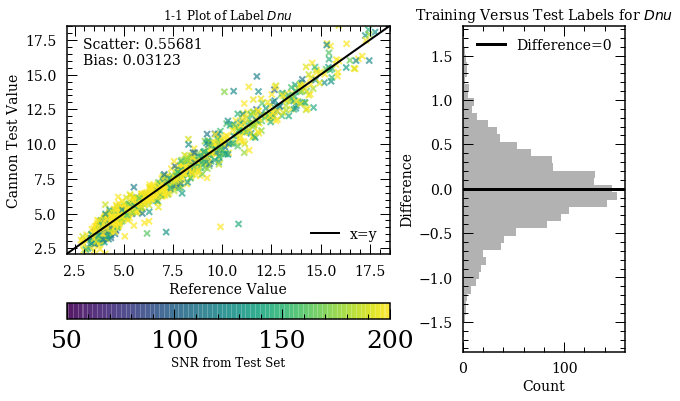

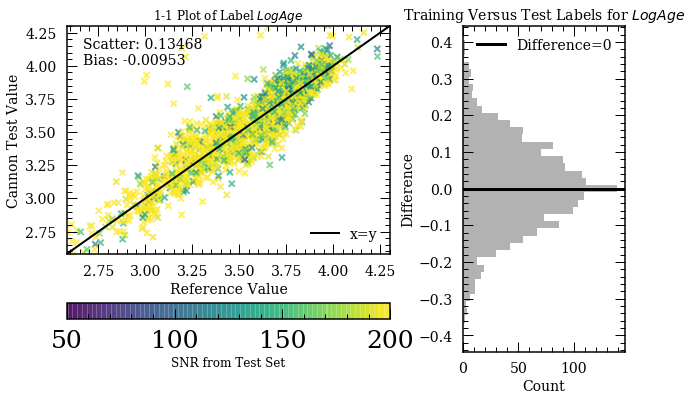

In [151]:
# no flags
diagnostics_1to1(ds)

Text(0.5, 1.0, 'Testing set')

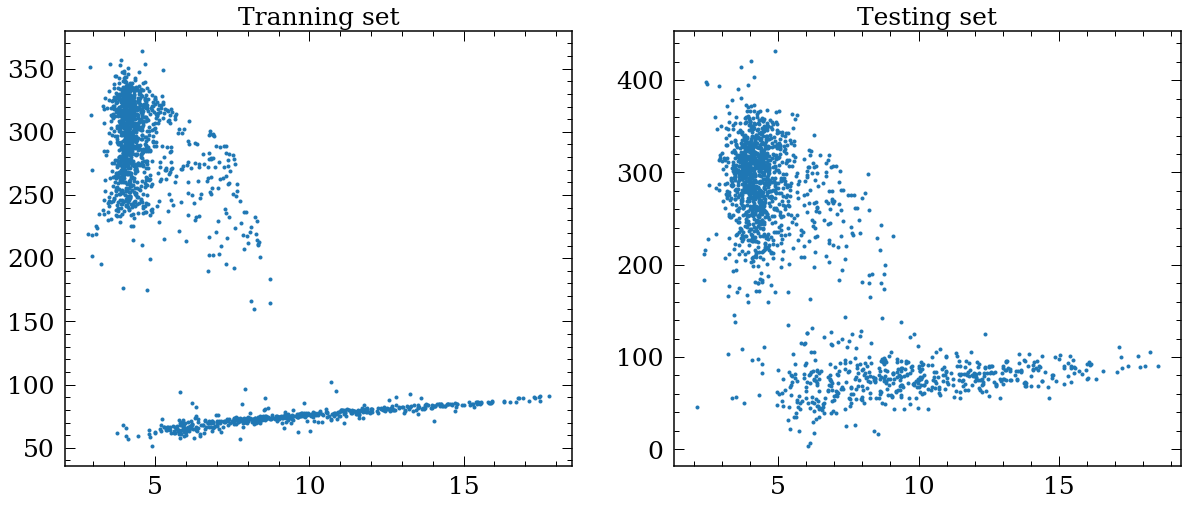

In [152]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.plot(ds.test_label[:,5],ds.test_label[:,4],'.')
plt.title('Tranning set',fontsize=25)
plt.subplot(1,2,2)
plt.plot(ds.test_label_vals[:,5],ds.test_label_vals[:,4],'.')
plt.title('Testing set',fontsize=25)

# Same trainning and testing set


In [166]:
from TheCannon import dataset
#from importlib import reload  
#reload(dataset)

ds = dataset.Dataset(wl, tr_ID, tr_flux, tr_ivar, tr_label, 
                     tr_ID, tr_flux, tr_ivar, tr_label)



Loading dataset
This may take a while...


Diagnostic for SNRs of reference and survey objects


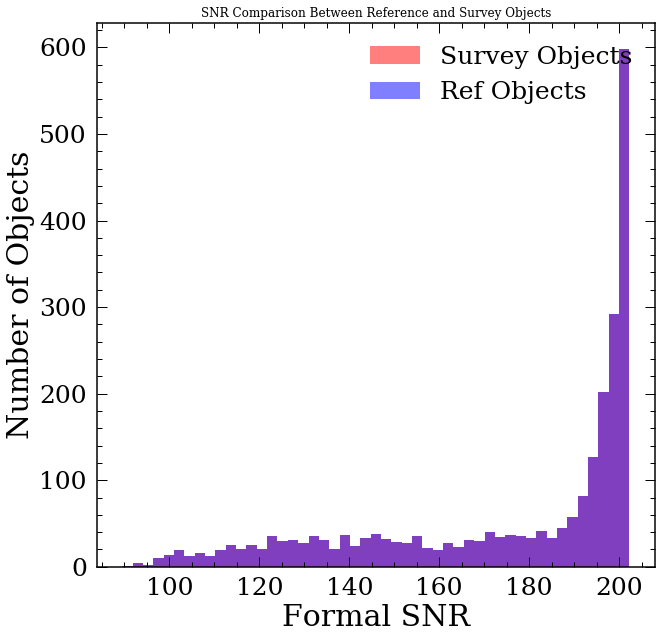

In [167]:
ds.set_label_names(['[Fe/H]','T_{eff}','Log(g)','[Mg/Fe]','D P','D nu','LogAge'])

fig = ds.diagnostics_SNR()



Plotting every label against every other


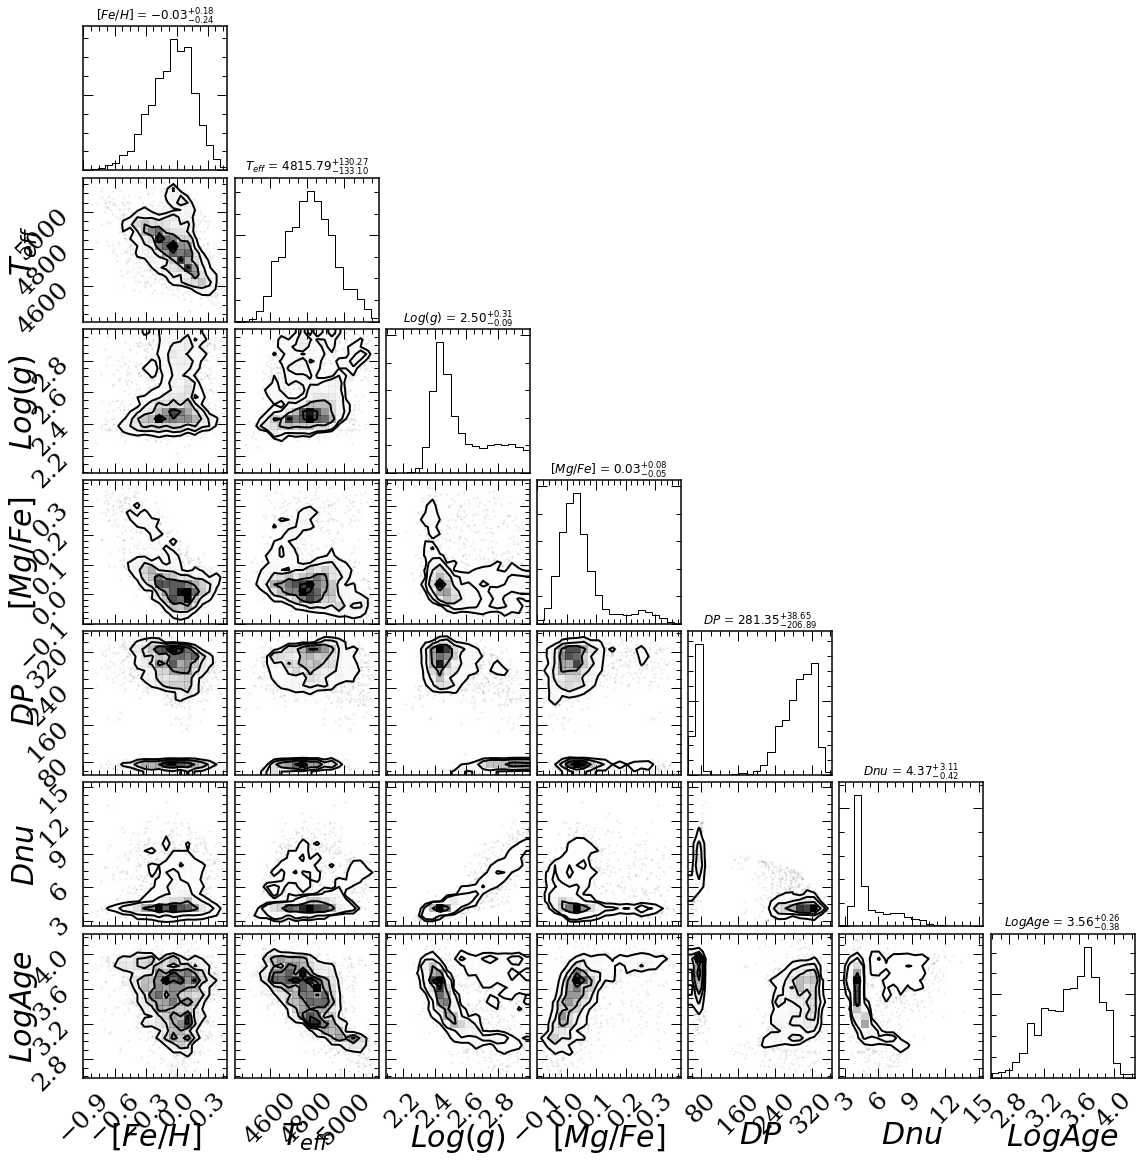

In [168]:
fig = ds.diagnostics_ref_labels()

In [169]:
from TheCannon import model
md = model.CannonModel(2, useErrors=False)
md.fit(ds)

<TheCannon.model.CannonModel object at 0x169d8d080> <TheCannon.dataset.Dataset object at 0x154c98ac8>
Done training model. 


Diagnostic plot: leading coeffs and scatters across wavelength.


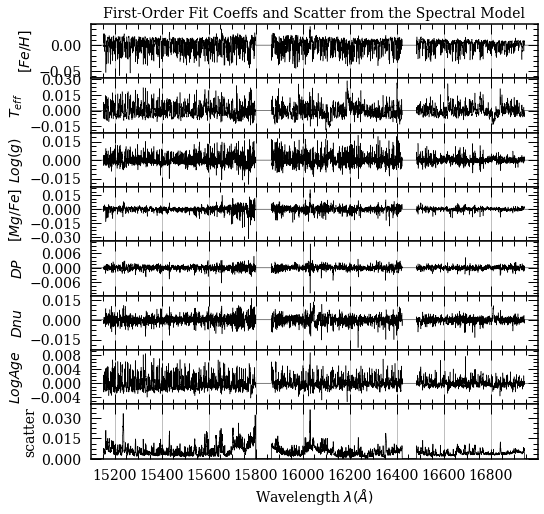

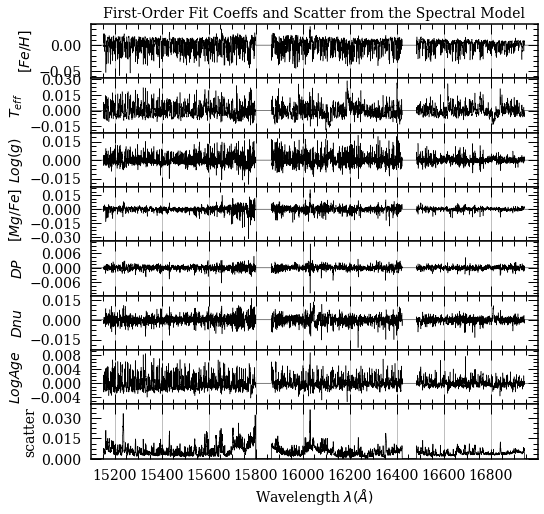

In [170]:
md.diagnostics_leading_coeffs(ds)


In [171]:
md.diagnostics_plot_chisq(ds)

Diagnostic plot: histogram of the red chi squareds of the fit
Saved as modelfit_chisqs.png


In [172]:
label_errs = md.infer_labels(ds)

Inferring Labels


Plotting every label against every other


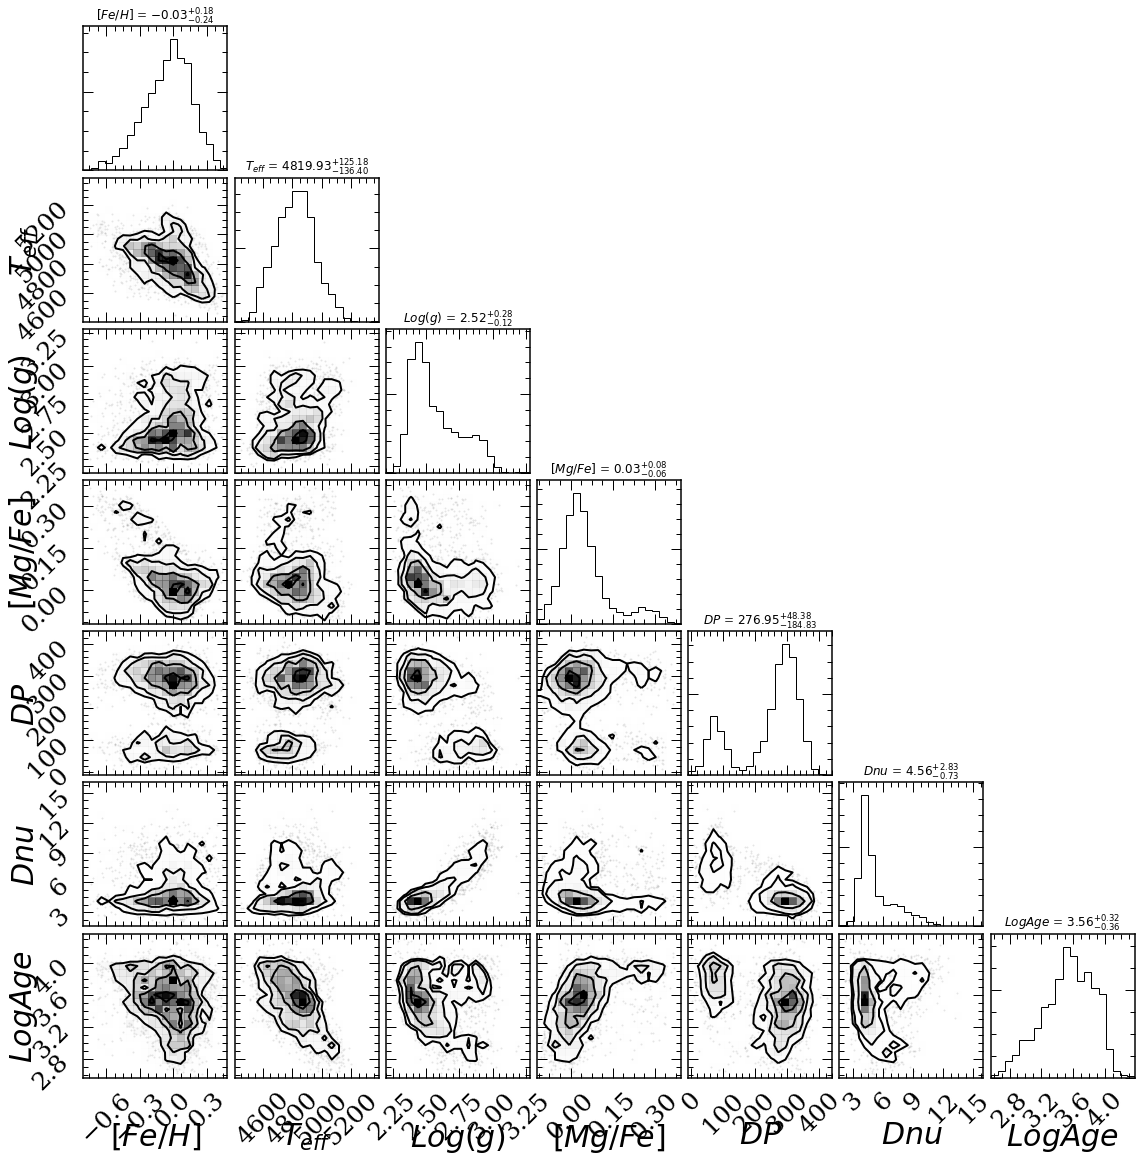

In [173]:
ds.diagnostics_survey_labels()

7


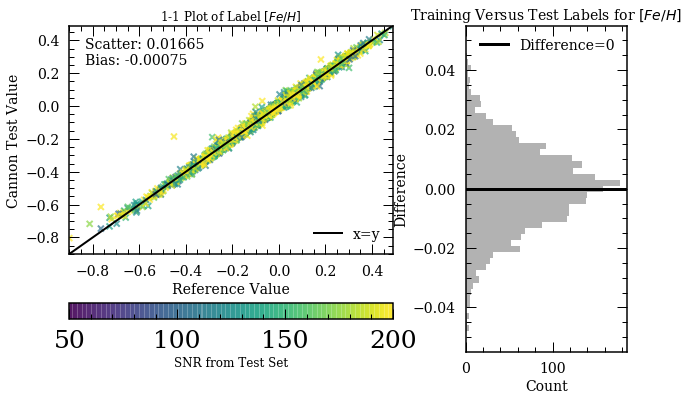

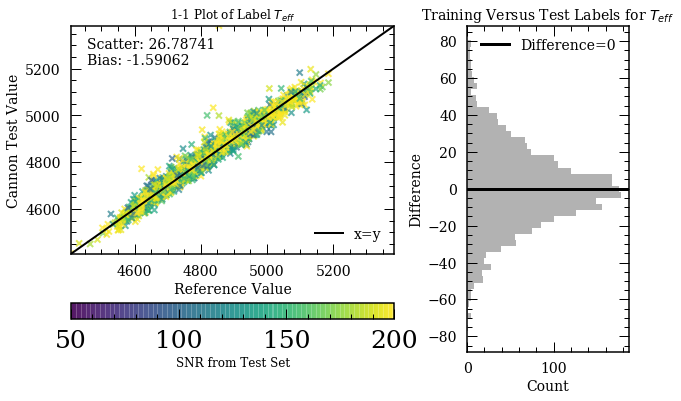

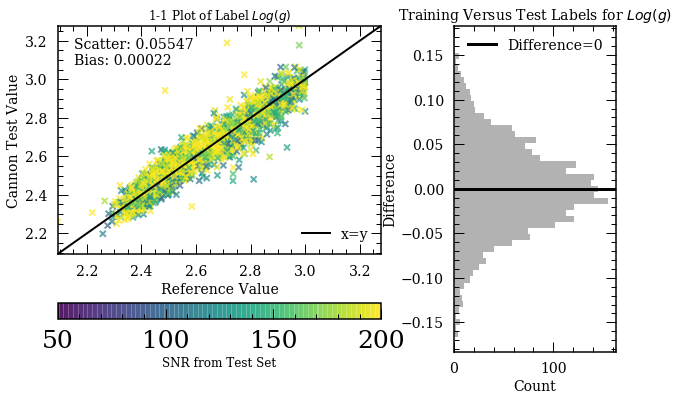

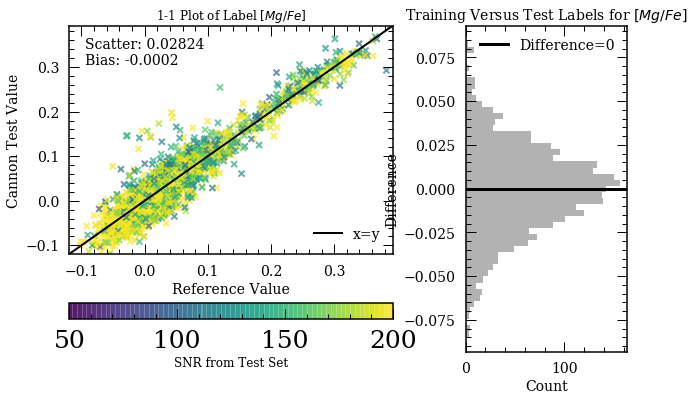

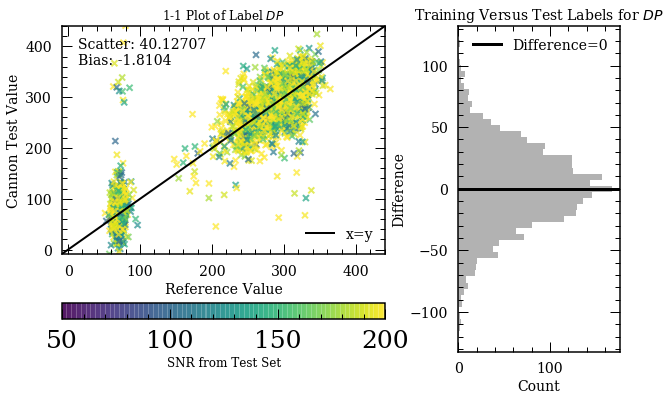

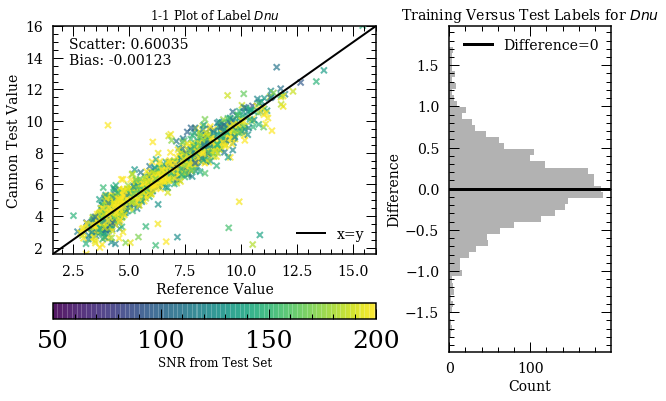

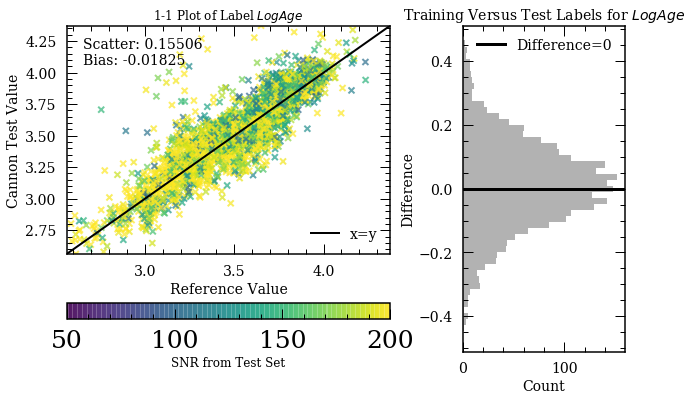

In [174]:
diagnostics_1to1(ds)

Text(0.5, 1.0, 'Testing set')

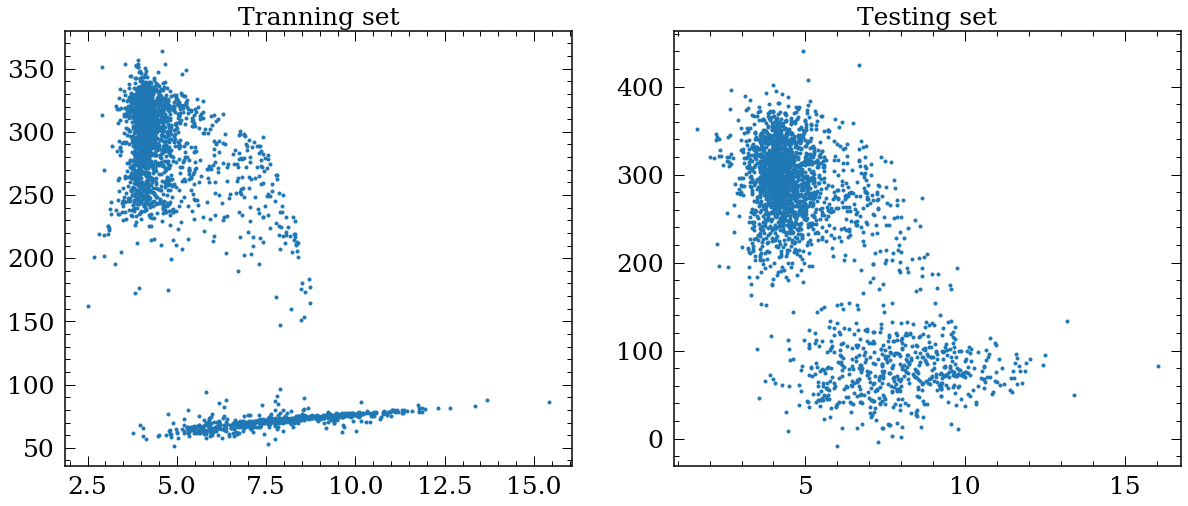

In [175]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.plot(ds.test_label[:,5],ds.test_label[:,4],'.')
plt.title('Tranning set',fontsize=25)
plt.subplot(1,2,2)
plt.plot(ds.test_label_vals[:,5],ds.test_label_vals[:,4],'.')
plt.title('Testing set',fontsize=25)

# Train only on period spacing, dnu

In [176]:
from TheCannon import dataset
#from importlib import reload  
#reload(dataset)

ds = dataset.Dataset(wl, tr_ID, tr_flux, tr_ivar, tr_label[:,[-2,-3]], 
                     tr_ID, tr_flux, tr_ivar, tr_label[:,[-2,-3]])




Loading dataset
This may take a while...


Diagnostic for SNRs of reference and survey objects


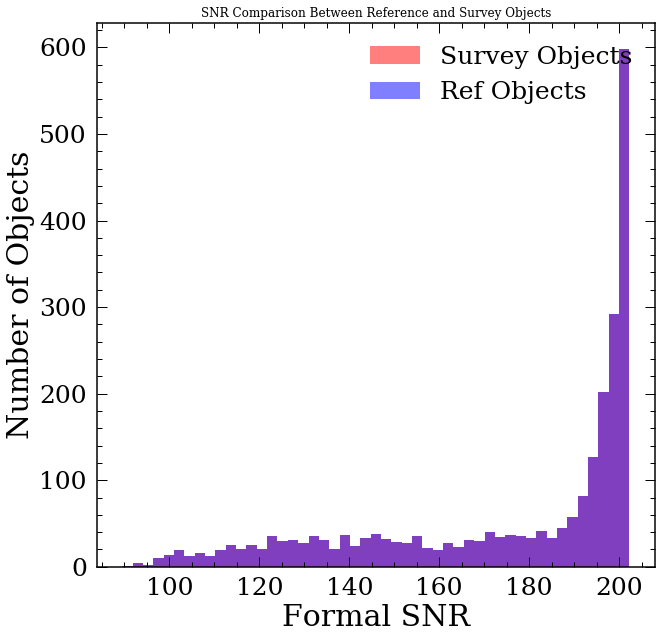

In [177]:
ds.set_label_names(['D nu','D P'])

fig = ds.diagnostics_SNR()




Plotting every label against every other


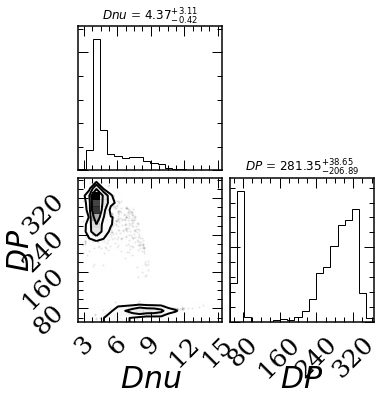

In [178]:
fig = ds.diagnostics_ref_labels()

In [183]:
from TheCannon import model
md = model.CannonModel(3, useErrors=False)
md.fit(ds)

<TheCannon.model.CannonModel object at 0x169c8a7b8> <TheCannon.dataset.Dataset object at 0x12fd0be80>
Done training model. 


Diagnostic plot: leading coeffs and scatters across wavelength.


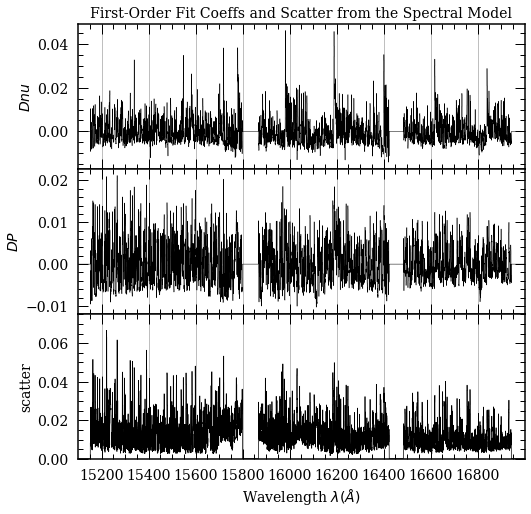

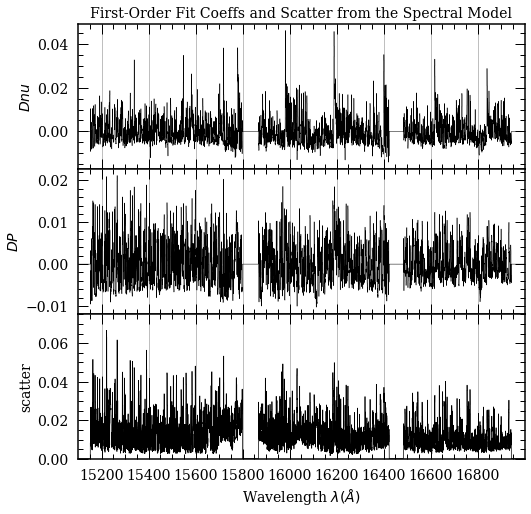

In [184]:
md.diagnostics_leading_coeffs(ds)


Diagnostic plot: histogram of the red chi squareds of the fit
Saved as modelfit_chisqs.png
Inferring Labels
Plotting every label against every other


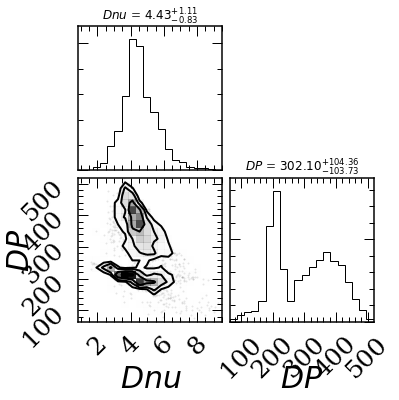

In [185]:
md.diagnostics_plot_chisq(ds)
label_errs = md.infer_labels(ds)
ds.diagnostics_survey_labels()

2


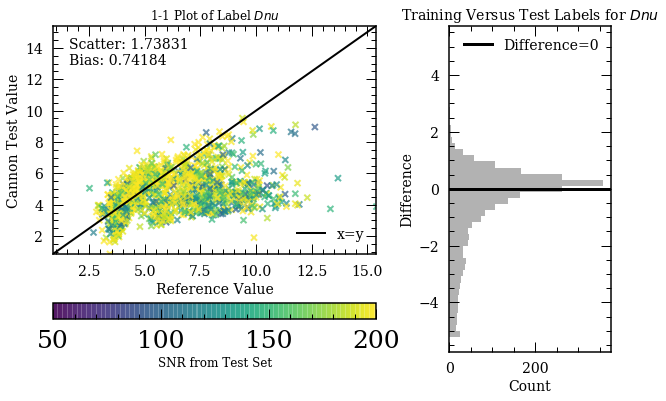

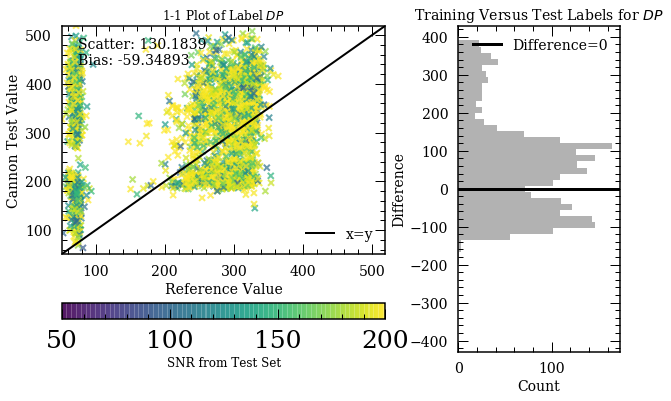

In [186]:
diagnostics_1to1(ds)

# get path for all APOGEE stars


In [195]:
filenames=[]
fields=df_apogee.FIELD.values
filename=df_apogee.FILE.values
for i in range(len(df_apogee)):
    path='/moto/astro/projects/APOGEE_dr16/apo25m/'+str(fields[i])+str(filename[i])
    filenames.append(path)
df_apogee['path']=filenames

In [202]:
df_apogee[['path','FIELD']].to_pickle('APOGEE_paths.pkl')

In [5]:
list(pd.read_pickle('APOGEE_paths.pkl').FIELD.unique())

['120+12',
 '060-75',
 '116-04',
 'N7789',
 '117+01',
 '105-45',
 '116+00',
 '120+18',
 '120+08',
 'N188',
 'hip',
 '100-60',
 'N188-RV',
 '120+06',
 'SMC1',
 'moving_groups',
 '120+04',
 '47TUC',
 '090-75',
 '120+00',
 '120-04',
 'Mdwarfs',
 '120-06',
 '110-60',
 '120-08',
 '120-08-RV',
 '110-62_MGA',
 'rrlyr',
 '120-12',
 '120-24_btx',
 'SMC2',
 'ANDR1',
 '120-30',
 'SMC3',
 '116-63_MGA',
 '120-45',
 'ANDR2',
 'ANDR3',
 'calibration',
 '120-60',
 '120-61-O',
 '120-75',
 'Bestars',
 '124+04',
 'TRIAND-5',
 '124-04',
 '123-53-O',
 '124+00',
 'N362',
 'N288',
 '126-59-O',
 '126-55-O',
 'SMC4',
 '125-12',
 'SCULPTOR',
 '130-60',
 '125+12',
 '126-24_btx',
 'SMC5',
 '133-55-O',
 '134-51-O',
 '128-04',
 '128+00',
 '140-60',
 '135-45',
 '128+04',
 'M33',
 '140-55-O',
 'SMC6',
 '135-30',
 '150-60',
 '180-75',
 '143-47_MGA',
 '131-04',
 'TRIAND-2',
 '131+00',
 'SgrO2',
 '146-46_MGA',
 '147-46_MGA',
 'SMC7',
 '135-12',
 '160-60',
 '131+04',
 '150-45',
 '151-45_MGA',
 '135-06',
 '170-60',
 '140-